# Credit **Card**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE


data loading

In [ ]:
data = pd.read_csv('/content/sample_data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Preprocessing

In [ ]:
data = data.dropna(subset=['Class'])
X= data.drop('Class', axis=1 )
y = data['Class']

normalise

In [ ]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [ ]:
#train test spilt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_Scaled, y, test_size=0.3, random_state=42, stratify=y
)

Handle class imbalance using SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_probabilities))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27297
         1.0       0.95      0.84      0.89        63

    accuracy                           1.00     27360
   macro avg       0.97      0.92      0.95     27360
weighted avg       1.00      1.00      1.00     27360

Random Forest ROC-AUC: 0.9643041766901531


In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display features and their importance
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
   Feature  Importance
14     V14    0.203760
10     V10    0.104899
12     V12    0.104580
17     V17    0.089565
3       V3    0.085977
4       V4    0.084226
11     V11    0.057411
16     V16    0.051844
2       V2    0.042643
9       V9    0.029719
27     V27    0.021540
7       V7    0.014816
5       V5    0.013716
23     V23    0.009360
20     V20    0.008472
18     V18    0.008404
21     V21    0.007830
6       V6    0.007599
13     V13    0.005969
28     V28    0.005796
29  Amount    0.005690
1       V1    0.005435
8       V8    0.005157
15     V15    0.004361
25     V25    0.004212
0     Time    0.004000
24     V24    0.003709
26     V26    0.003224
19     V19    0.003212
22     V22    0.002875


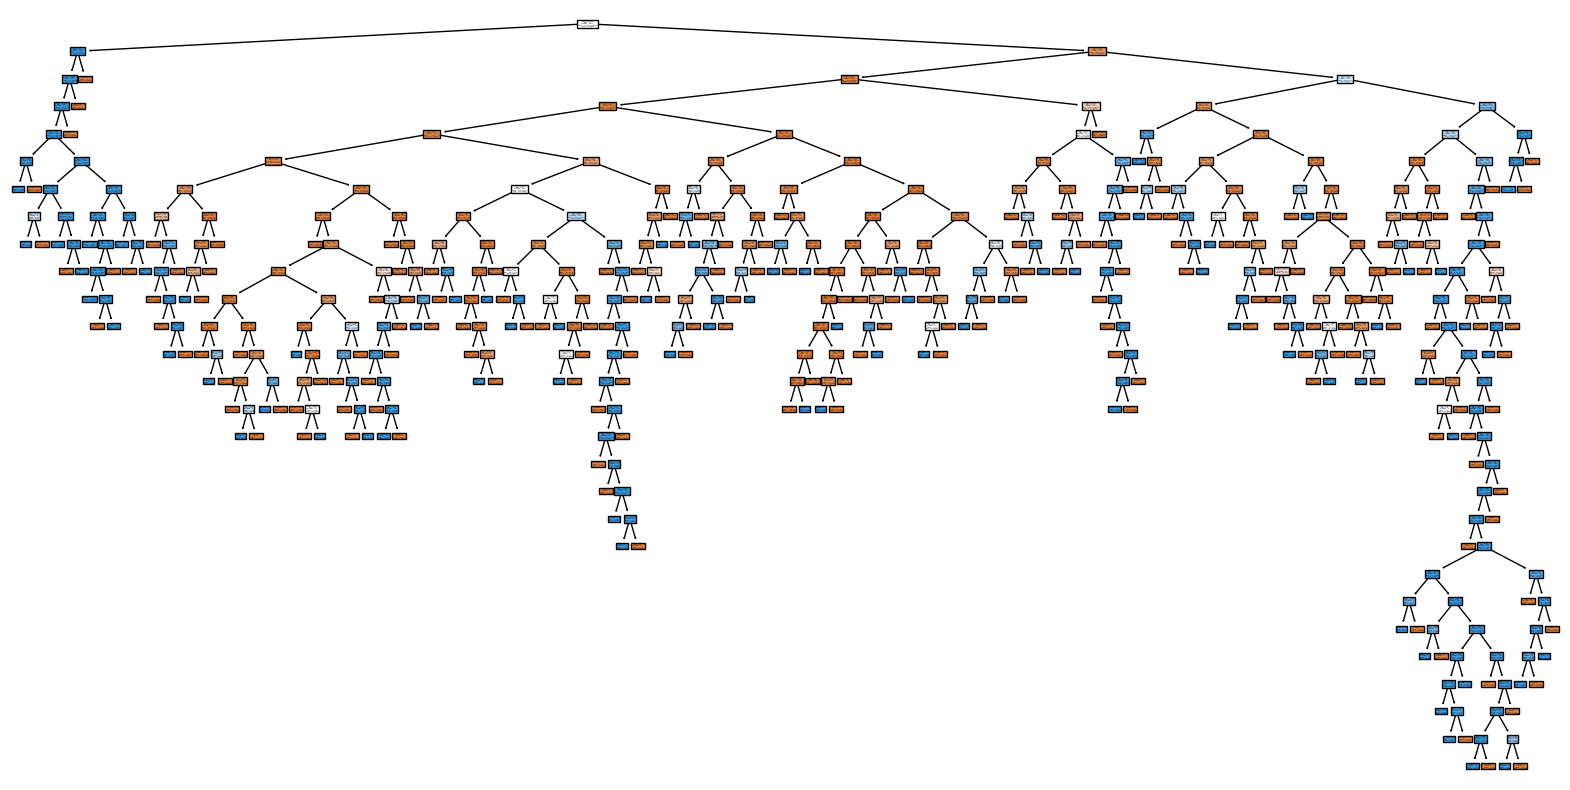

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot one of the trees in the random forest
plt.figure(figsize=(20, 10))
# Change 'model' to 'rf_model' to access the fitted random forest model
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'])
plt.show()